<a href="https://colab.research.google.com/github/taniahuertas/Data-Lab-Laboratoria/blob/main/Data_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📑 Introducción

El presente análisis se realizó en lenguaje python a partir de un Dataset de Amazon con información de más de 1.000 calificaciones, reseñas, precios y descuentos de productos disponibles en la plataforma. El objetivo central es obtener insights accionables que contribuyan a optimizar la estrategia comercial, la gestión de inventario y las campañas de marketing, alineando el análisis de datos con la toma de decisiones de negocio.

## 🎯 Objetivos

1. Identificar patrones en precios, descuentos, calificaciones y categorías de los productos, con el fin de proponer acciones que mejoren el desempeño comercial.

2. Explorar relaciones cuantitativas entre variables mediante un modelo de regresión lineal, evaluando en qué medida factores como el precio, el nivel de descuento y el número de reseñas influyen en la calificación de los productos.

## 🛠️ Metodología

- *Análisis exploratorio de datos (EDA)*: responder preguntas clave sobre precios, descuentos, calificaciones y categorías para orientar decisiones estratégicas.

- *Regresión lineal*: aplicada para cuantificar el impacto relativo de las variables de negocio sobre la calificación de los productos, entendiendo que, aunque la relación puede ser débil, permite identificar tendencias y generar hipótesis para análisis más complejos.

## 🛠️ Herramientas:

Google Colab:https://colab.research.google.com/
Chat GPT: https://chatgpt.com/
Gamma: https://gamma.app/
Notebooklm: https://notebooklm.google/
Skywork: https://skywork.ai/





##✅Organización de ambiente de trabajo

###👉 Importación de librerías

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

###👉 Carga de la Data

In [4]:
product=pd.read_csv('https://raw.githubusercontent.com/taniahuertas/Data-Lab-Laboratoria/refs/heads/main/data/amazon%20-%20amazon_product.csv')
product.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [5]:
reviews=pd.read_csv('https://raw.githubusercontent.com/taniahuertas/Data-Lab-Laboratoria/refs/heads/main/data/amazon%20-%20amazon_review.csv')
reviews.head()

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269"
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4,"43,994"
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,B096MSW6CT,3.9,"7,928"
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,B08HDJ86NZ,4.2,"94,363"
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,B08CF3B7N1,4.2,"16,905"


##✅Limpieza Data

###👉 Formateo de campos

In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1469 non-null   object
 1   product_name         1469 non-null   object
 2   category             1469 non-null   object
 3   discounted_price     1469 non-null   object
 4   actual_price         1469 non-null   object
 5   discount_percentage  1469 non-null   object
 6   about_product        1465 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


In [7]:
product['discounted_price'] = (
    product['discounted_price']
    .str.replace('₹','', regex=False)
    .str.replace(',','', regex=False)
    .astype(float)
)

product['actual_price'] = (
    product['actual_price']
    .str.replace('₹','', regex=False)
    .str.replace(',','', regex=False)
    .astype(float)
)

# Descuento: eliminar % y convertir a float
product['discount_percentage'] = (
    product['discount_percentage']
    .str.replace('%','', regex=False)
    .astype(float)
)

# Columnas de texto: limpiar espacios
text_cols = ['product_id', 'product_name', 'category', 'about_product']
for col in text_cols:
    product[col] = product[col].astype(str).str.strip()

product.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [8]:
reviews.head().T

,0,1,2,3,4
user_id,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."
user_name,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."
review_id,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R..."
review_title,"Satisfied,Charging is really fast,Value for mo...","A Good Braided Cable for Your Type C Device,Go...","Good speed for earlier versions,Good Product,W...","Good product,Good one,Nice,Really nice product...","As good as original,Decent,Good one for second..."
review_content,Looks durable Charging is fine tooNo complains...,I ordered this cable to connect my phone to An...,"Not quite durable and sturdy,https://m.media-a...","Good product,long wire,Charges good,Nice,I bou...","Bought this instead of original apple, does th..."
img_link,https://m.media-amazon.com/images/W/WEBP_40237...,https://m.media-amazon.com/images/W/WEBP_40237...,https://m.media-amazon.com/images/W/WEBP_40237...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://m.media-amazon.com/images/W/WEBP_40237...
product_link,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,https://www.amazon.in/Ambrane-Unbreakable-Char...,https://www.amazon.in/Sounce-iPhone-Charging-C...,https://www.amazon.in/Deuce-300-Resistant-Tang...,https://www.amazon.in/Portronics-Konnect-POR-1...
product_id,B07JW9H4J1,B098NS6PVG,B096MSW6CT,B08HDJ86NZ,B08CF3B7N1
rating,4.2,4,3.9,4.2,4.2
rating_count,"24,269","43,994","7,928","94,363","16,905"


In [9]:
# --- LIMPIEZA Y FORMATEO ---
# Limpiar columnas de texto
text_cols = ['user_id', 'user_name', 'review_id',
             'review_title', 'review_content',
             'img_link', 'product_link', 'product_id']
for col in text_cols:
    reviews[col] = reviews[col].astype(str).str.strip()

# Convertir rating a float
reviews['rating'] = pd.to_numeric(reviews['rating'], errors='coerce')

# Convertir rating_count a int con imputación de NA -> 0
reviews['rating_count'] = (
    reviews['rating_count']
    .astype(str)                       # asegurar string
    .str.replace(',', '', regex=False) # quitar comas
)
reviews['rating_count'] = pd.to_numeric(
    reviews['rating_count'], errors='coerce'
).fillna(0).astype(int)

In [10]:
reviews.head()

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,24269
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG,4.0,43994
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,B096MSW6CT,3.9,7928
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,B08HDJ86NZ,4.2,94363
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,B08CF3B7N1,4.2,16905


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1465 non-null   object 
 1   user_name       1465 non-null   object 
 2   review_id       1465 non-null   object 
 3   review_title    1465 non-null   object 
 4   review_content  1465 non-null   object 
 5   img_link        1465 non-null   object 
 6   product_link    1465 non-null   object 
 7   product_id      1465 non-null   object 
 8   rating          1464 non-null   float64
 9   rating_count    1465 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 114.6+ KB


In [12]:
product=product.drop_duplicates(subset=["product_id"])

In [13]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1351 non-null   object 
 1   product_name         1351 non-null   object 
 2   category             1351 non-null   object 
 3   discounted_price     1351 non-null   float64
 4   actual_price         1351 non-null   float64
 5   discount_percentage  1351 non-null   float64
 6   about_product        1351 non-null   object 
dtypes: float64(3), object(4)
memory usage: 84.4+ KB


In [14]:
reviews=reviews.drop_duplicates(subset=["product_id","review_id"])

In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1361 non-null   object 
 1   user_name       1361 non-null   object 
 2   review_id       1361 non-null   object 
 3   review_title    1361 non-null   object 
 4   review_content  1361 non-null   object 
 5   img_link        1361 non-null   object 
 6   product_link    1361 non-null   object 
 7   product_id      1361 non-null   object 
 8   rating          1360 non-null   float64
 9   rating_count    1361 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 117.0+ KB


In [16]:
product.describe()

,discounted_price,actual_price,discount_percentage
count,1351.000000,1351.000000,1351.000000
mean,3304.801754,5691.176625,46.685418
std,7173.975455,11218.666235,21.632611
min,39.000000,39.000000,0.000000
25%,349.000000,899.000000,31.000000
50%,899.000000,1795.000000,49.000000
75%,2174.000000,4575.000000,62.000000
max,77990.000000,139900.000000,94.000000


#📊 Análisis exploratorio

##📊 Distribución de precio con descuento, precio original, porcentaje de descuento

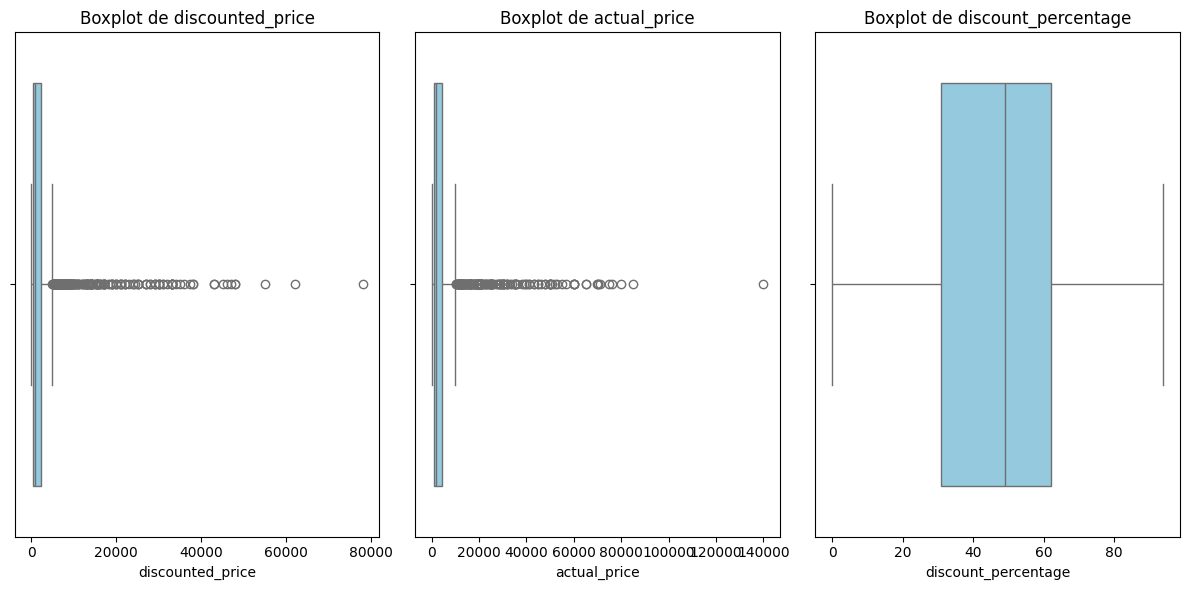

In [17]:
# Seleccionar columnas numéricas
num_cols = ["discounted_price", "actual_price", "discount_percentage"]

# Crear subplots en una sola figura
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)  # 1 fila, 3 columnas
    sns.boxplot(x=product[col], color="skyblue")
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

Interpretación e Insights de negocio


1. Boxplot de discounted_price: La mayoría de productos tienen precios bastante bajos, muy concentrados cerca de la base de la escala, sin embargo existen muchos outliers, por lo que hay productos extremadamente caros en comparación con la mayoría, lo cual puede distorsionar el análisis si no se normaliza o se filtran outliers.

2. Boxplot de actual_price: La mayoría de precios originales están en rangos bajos, pero algunos productos alcanzan valores de hasta 140,000. Esto confirma que en categorías populares conviven productos de ticket bajo (masivos) con unos pocos premium o de lujo.

3. Boxplot de discount_percentage: Distribución más simétrica y concentrada. La mediana se ubica alrededor de 50%. El rango intercuartílico (IQR) está aproximadamente entre 35% y 65%, lo cual indica que la mayoría de productos tienen descuentos en este rango. No hay outliers extremos, lo que indica que el descuento es una variable mucho más “estable” que el precio.

Insights de negocio

  - El precio (con o sin descuento) está altamente sesgado: la mayoría de los productos son de bajo costo, pero existen pocos artículos con precios extremadamente altos que podrían estar “empujando” la media hacia arriba.

  - El descuento se mantiene consistente en la mayoría de productos, lo cual sugiere que el marketplace aplica políticas de descuentos más homogéneas que los precios base.

  - Estos hallazgos muestran que no basta con mirar la media de precios, ya que está influida por outliers; es mejor trabajar con la mediana o precios segmentados.

In [18]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1351 non-null   object 
 1   product_name         1351 non-null   object 
 2   category             1351 non-null   object 
 3   discounted_price     1351 non-null   float64
 4   actual_price         1351 non-null   float64
 5   discount_percentage  1351 non-null   float64
 6   about_product        1351 non-null   object 
dtypes: float64(3), object(4)
memory usage: 84.4+ KB


In [19]:
# Filtrar los registros con actual_price superior a 4.5k

product[product['actual_price']<4574].sort_values(by='actual_price', ascending=False)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
1229,B078JBK4GX,Havells Instanio 1-Litre 3KW Instant Water Hea...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",2599.0,4560.0,43.0,Type: Instant ; Capacity: 1 Litre; Wattage: 30...
298,B09HN7LD5L,PROLEGEND® PL-T002 Universal TV Stand Table To...,"Electronics|HomeTheater,TV&Video|Accessories|T...",1850.0,4500.0,59.0,TV LEG】--The universal tv stand base fits most...
656,B07LG59NPV,Boult Audio Probass Curve Bluetooth Wireless i...,"Electronics|Headphones,Earbuds&Accessories|Hea...",899.0,4499.0,80.0,"Long Battery Life - Curve is a powerhouse,Offe..."
655,B0B1F6GQPS,"Boult Audio FXCharge with ENC, 32H Playtime, 5...","Electronics|Headphones,Earbuds&Accessories|Hea...",999.0,4499.0,78.0,Environmental Noise Cancellation: Equipped wit...
1313,B0B1MDZV9C,"INALSA Upright Vacuum Cleaner, 2-in-1,Handheld...","Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2286.0,4495.0,49.0,2-in-1 Handheld & Stick Vacuum Cleaner: With t...
...,...,...,...,...,...,...,...
811,B00P93X2H6,Classmate Pulse Spiral Notebook - 240 mm x 180...,OfficeProducts|OfficePaperProducts|Paper|Stati...,67.0,75.0,11.0,The cover design of the notebook is subject to...
710,B08TDJNM3G,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,59.0,59.0,0.0,"Portable, easy to use|LED lights for maximum i..."
616,B07KCMR8D6,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,50.0,50.0,0.0,5 vibrant Neon body color|Smooth and fast writ...
975,B08TDJ5BVF,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,39.0,39.0,0.0,The side the LED light falls on will depend on...


In [20]:
reviews.groupby('product_id').count().sort_values(by='review_id', ascending=False)

,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating,rating_count
product_id,,,,,,,,,
B09ZQK9X8G,2,2,2,2,2,2,2,2,2
B09V12K8NT,2,2,2,2,2,2,2,2,2
B08WRBG3XW,2,2,2,2,2,2,2,2,2
B097R25DP7,2,2,2,2,2,2,2,2,2
B09YV4MW2T,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
B07WDK3ZS6,1,1,1,1,1,1,1,1,1
B07WDK3ZS2,1,1,1,1,1,1,1,1,1
B07W9KYT62,1,1,1,1,1,1,1,1,1


In [21]:
#Crear un dataset que haga una suma de rating_count y promedie el rating agrupado por product_id

product_reviews = reviews.groupby('product_id').agg({'rating_count': 'sum', 'rating': 'mean'}).reset_index()
product_reviews.head()

,product_id,rating_count,rating
0,B002PD61Y4,8131,4.1
1,B002SZEOLG,179692,4.2
2,B003B00484,27201,4.3
3,B003L62T7W,31534,4.3
4,B004IO5BMQ,54405,4.5


##👉 Unir Tablas

In [22]:
# Unir tablas review y product_reviews

df = pd.merge(product, product_reviews, on='product_id', how='inner')
df


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,rating_count,rating
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...,24269,4.2
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,"Compatible with all Type C enabled devices, be...",43994,4.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,【 Fast Charger& Data Sync】-With built-in safet...,7928,3.9
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,The boAt Deuce USB 300 2 in 1 cable is compati...,94363,4.2
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,16905,4.2
...,...,...,...,...,...,...,...,...,...
1346,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,1090,4.0
1347,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,"230 Volts, 400 watts, 1 Year",4118,4.1
1348,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28.0,International design and styling|Two heat sett...,468,3.6
1349,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,8031,4.0


In [23]:
# Extraer todo lo que está antes del primer '|'
df["category_main"] = df["category"].str.split("|").str[0]

# Verificar
df[["category", "category_main"]].head()

,category,category_main
0,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
1,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
2,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
3,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
4,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories


In [24]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,rating_count,rating,category_main
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,High Compatibility : Compatible With iPhone 12...,24269,4.2,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,"Compatible with all Type C enabled devices, be...",43994,4.0,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,【 Fast Charger& Data Sync】-With built-in safet...,7928,3.9,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,The boAt Deuce USB 300 2 in 1 cable is compati...,94363,4.2,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,16905,4.2,Computers&Accessories


In [25]:
df.to_csv('amazon.csv', index=False)

##📊  Distribución de precio por categorías

In [26]:
#mismo boxplot pero con plottly para que sea dinámico con titulo "Distribución de precio por categoria principal"

import plotly.express as px

fig = px.box(df, y="category_main", x="actual_price")
fig.update_layout(title_text="Distribución de precio por categoria principal")
fig.show()

Interpretación e Insights de negocio

- Electronics: Amplia dispersión de precios, con una mediana bastante baja   pero con outliers que superan los 100k–140k. Esto confirma que la categoría tiene productos masivos de bajo costo (accesorios, gadgets) y otros extremadamente caros (computadoras, equipos de alto desempeño). Es la categoría con mayor concentración de outliers.

- Home&Kitchen: Similar a Electronics con mediana baja, pero con productos que llegan hasta los 60k. Indica coexistencia de productos básicos (utensilios, pequeños electrodomésticos) y premium (muebles, equipos grandes).

- Computers&Accessories: Menor dispersión que Electronics, pero también con algunos precios altos (hasta 60k–80k). Muestra un patrón típico: muchos productos de bajo precio (cables, periféricos), junto con algunos equipos premium.

*Categorías más estables:*

- OfficeProducts, Toys&Games, Health&PersonalCare: tienen precios mucho más concentrados, con pocas variaciones y sin outliers extremos. Esto indica que son segmentos más homogéneos en ticket promedio.

Insights de negocio

- Electronics y Home&Kitchen concentran los mayores outliers de precio. Son categorías heterogéneas donde conviven productos de bajo costo con otros muy caros.

- La mayoría de categorías tienen tickets relativamente bajos y estables. Esto implica que las estrategias de descuento y marketing deben adaptarse a la heterogeneidad de cada segmento.

- Los outliers premium pueden distorsionar la percepción del consumidor si aparecen junto a productos mucho más baratos en búsquedas.

##👉 Medidas de tendencia central y dispersión

In [27]:
df.describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

,discounted_price,actual_price,discount_percentage,rating_count,rating
count,1351.000000,1351.000000,1351.000000,1351.000000,1350.000000
mean,3304.801754,5691.176625,46.685418,17898.410067,4.091852
std,7173.975455,11218.666235,21.632611,42745.089343,0.297444
min,39.000000,39.000000,0.000000,0.000000,2.000000
5%,144.000000,300.000000,8.000000,89.000000,3.600000
25%,349.000000,899.000000,31.000000,1094.500000,3.900000
50%,899.000000,1795.000000,49.000000,4736.000000,4.100000
75%,2174.000000,4575.000000,62.000000,16083.000000,4.300000
95%,16249.000000,24999.000000,80.000000,72784.000000,4.500000
max,77990.000000,139900.000000,94.000000,426973.000000,5.000000


In [28]:
df['category_main'].value_counts()

,count
category_main,
Electronics,490
Home&Kitchen,448
Computers&Accessories,375
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


##📊  Histograma de descuentos

In [29]:
#Histograma discount_price in plottly con kde

fig = px.histogram(df, x="discount_percentage", nbins=20)
fig.update_layout(title_text="Histograma de descuento")
fig.show()

Interpretación gráfica e Insights de negocio

- *Distribución general*: Los descuentos se distribuyen entre 0% y 90%, lo cual muestra un rango amplio de estrategias de pricing. La mayor concentración de productos está entre el 40% y 70% de descuento.

- *Picos en la distribución*: Hay varios “picos” o modas: alrededor de 40%, 50% y 60%. Esto sugiere que los vendedores o la plataforma aplican descuentos en “bloques estándar” (ej. 40%, 50%, 60%) en lugar de valores completamente aleatorios.

- *Extremos bajos y altos*: Muy pocos productos con descuentos menores al 10% lo cual implica que casi todos los productos se promueven con rebajas significativas. También son escasos los productos con más del 85% de descuento, lo cual podría corresponder a liquidaciones o campañas muy puntuales.

Insights de negocio

- La estrategia de descuentos está estandarizada en ciertos rangos (40–70%), probablemente porque son más atractivos psicológicamente para los consumidores (“mitad de precio” es un ancla común).

- La baja presencia de descuentos pequeños (menores al 10%) sugiere que en este marketplace la “sensación de oferta” es un factor clave, incluso en productos de bajo costo.

- Los descuentos muy altos (mayores al 80%) son raros y seguramente responden a casos específicos (liquidación de inventario, productos con baja rotación).



##📊 Histograma de precios

In [30]:
#Histograma discount_price

fig = px.histogram(df, x="actual_price", nbins=20)
fig.update_layout(title_text="Histograma de precio")
fig.show()

Interpretación gráfica e Insights de negocio

1. Distribución fuertemente sesgada a la derecha: La gran mayoría de productos tienen precios muy bajos (0 – 5k).Conforme aumenta el precio, la frecuencia cae de manera abrupta.

2. Productos de ticket medio y alto son minoría: Entre 20k y 60k aparecen muy pocos productos. Más allá de 80k – 140k, prácticamente no hay. Se confirma que los outliers premium, vistos en los boxplots, representan una fracción muy pequeña.

3. Mercado dominado por bajo costo: El mercado está compuesto principalmente por productos accesibles (accesorios, pequeños gadgets, consumibles). Los productos premium parecen casos puntuales más que la norma.

Insights de negocio

- El core del marketplace está en productos de bajo precio, que constituyen el grueso de la oferta y probablemente de la demanda.

- Los productos premium son muy pocos y poco representativos; sin embargo, pueden ser útiles para campañas de imagen o branding.

- Dado que el histograma cae en forma exponencial, esto sugiere un mercado de volumen y no de margen alto: las ventas se concentran en productos masivos.


#❓Preguntas de Negocio

Con correlación de variables

## 📌 1. ¿Cuánto mayor sea el descuento, mejor será la puntuación del producto?




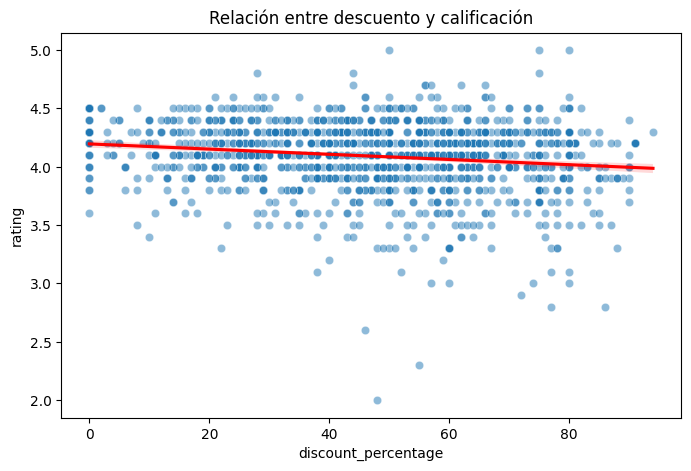

In [31]:
# Diagrama de dispersión con línea de tendencia
plt.figure(figsize=(8,5))
sns.scatterplot(x="discount_percentage", y="rating", data=df, alpha=0.5)
sns.regplot(x="discount_percentage", y="rating", data=df, scatter=False, color="red")
plt.title("Relación entre descuento y calificación")
plt.show()

*Interpretación gráfica:*

  El scatterplot muestra una nube de puntos entre descuento (%) y rating (1–5). La línea roja de regresión tiene pendiente negativa, aunque muy leve. Esto significa que a mayor descuento, la calificación tiende a bajar ligeramente, pero la relación es débil. La mayoría de los productos se concentran entre 3.8 y 4.5 de rating, independientemente del descuento aplicado.

*Insights de negocio*

- El nivel de descuento no garantiza una mejor calificación. Los clientes no parecen evaluar mejor los productos porque estén más baratos.

- Es posible que los descuentos se apliquen más a productos con menor demanda o peor percepción de calidad (de ahí la leve tendencia negativa).

## 📌 2. ¿Cuánto mayor sea el número de personas que lo evaluaron, mejor será la calificación?

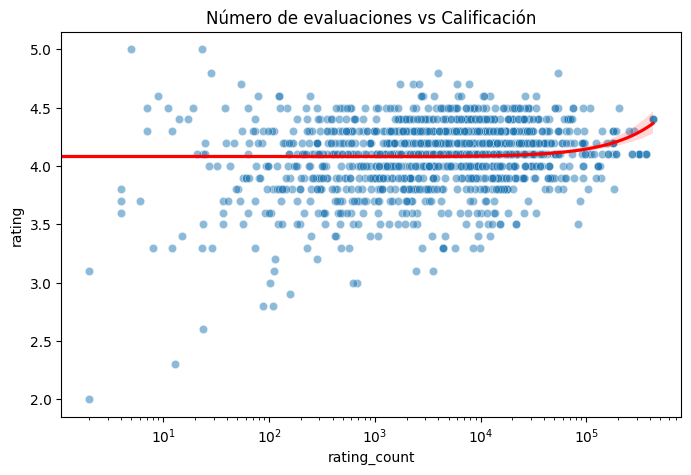

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="rating_count", y="rating", data=df, alpha=0.5)
sns.regplot(x="rating_count", y="rating", data=df, scatter=False, color="red")
plt.xscale("log")  # escala logarítmica para mejor visualización
plt.title("Número de evaluaciones vs Calificación")
plt.show()

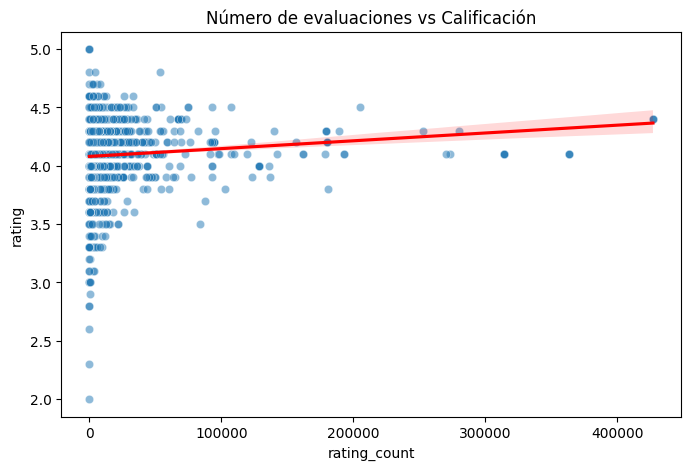

In [33]:
#Sin escala logarítmica
plt.figure(figsize=(8,5))
sns.scatterplot(x="rating_count", y="rating", data=df, alpha=0.5)
sns.regplot(x="rating_count", y="rating", data=df, scatter=False, color="red")
#plt.xscale("log")  # escala logarítmica para mejor visualización
plt.title("Número de evaluaciones vs Calificación")
plt.show()

*Interpretación gráfica*

- Gráfica 1 con escala logarítmica: Permite visualizar mejor la concentración de productos con pocas reseñas.

Se observa que a medida que el número de reseñas crece, la calificación tiende a estabilizarse cerca de 4.2–4.4.

La curva roja muestra una leve tendencia positiva (los productos con más reseñas tienden a tener calificaciones algo mejores).

Es más útil para análisis exploratorio porque evita que los valores extremos (productos con cientos de miles de reseñas) “aplasten” la distribución.

- Gráfico 2 sin escala logarítmica: La mayoría de los productos tienen pocas reseñas y quedan apretados en el eje izquierdo, lo cual hace difícil ver patrones en esa zona.

El modelo de regresión (línea roja) muestra tendencia positiva, pero queda dominado por los outliers (productos con muchísimas reseñas).

Comunica peor la realidad del dataset porque pierde el detalle en la base.

*Insights de negocio*

- Existe una correlación débil pero positiva: productos con más reseñas tienden a tener calificaciones ligeramente superiores. Esto puede deberse a un efecto de validación social: los productos más comprados y populares reciben reseñas más equilibradas y suelen estar en mejores posiciones de búsqueda, reforzando la percepción positiva.

## 📌 3. ¿Qué categorías concentran los productos con calificaciones más altas?

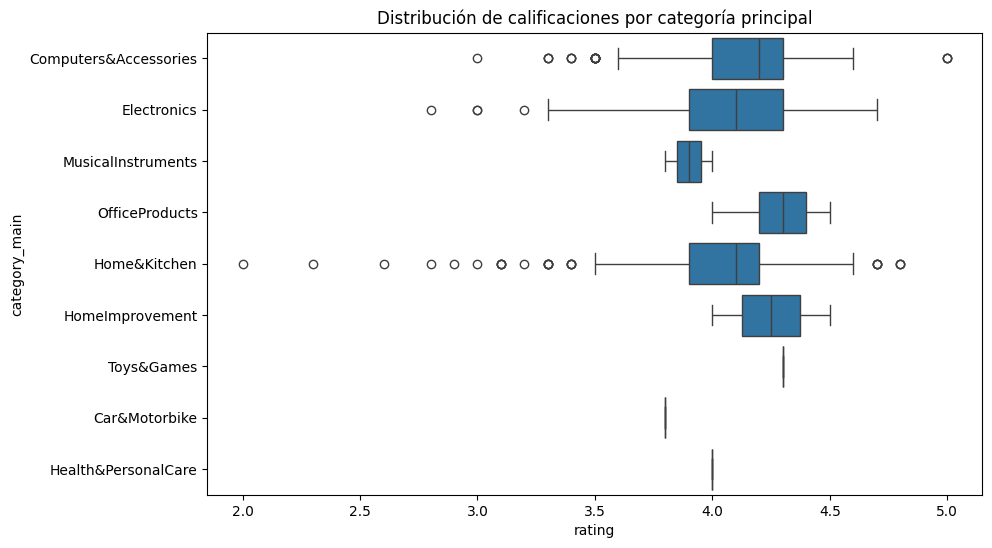

,rating
category_main,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.153867
Electronics,4.077755
Home&Kitchen,4.040716
Health&PersonalCare,4.000000
MusicalInstruments,3.900000
Car&Motorbike,3.800000


In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x="rating", y="category_main", data=df)
plt.title("Distribución de calificaciones por categoría principal")
plt.show()
# Promedio de calificación por categoría
df.groupby("category_main")["rating"].mean().sort_values(ascending=False)

*Interpretación gráfica*

1. Categorías con mejor calificación promedio: OfficeProducts (4.31), Toys&Games (4.30) y HomeImprovement (4.25) encabezan el ranking. Estas categorías muestran distribuciones bastante compactas: la mayoría de los productos están bien evaluados y con pocas variaciones.

2. Rango medio: Computers&Accessories (4.15), Electronics (4.08) y Home&Kitchen (4.04). Aunque también tienen buenas calificaciones, presentan más dispersión: algunos productos con valoraciones bajas generan mayor variabilidad.

3. Categorías con menor calificación promedio: Health&PersonalCare (4.00), MusicalInstruments (3.90) y Car&Motorbike (3.80). Aquí vemos mayor presencia de outliers y mayor variabilidad, lo que sugiere experiencias de cliente menos consistentes.

*Insights de negocio*

- Las categorías OfficeProducts, Toys&Games y HomeImprovement se destacan como segmentos de alta satisfacción del cliente: son apuestas seguras para reforzar reputación y fidelización.

- En contraste, categorías como Car&Motorbike y MusicalInstruments muestran calificaciones más bajas y dispersas, lo que podría estar relacionado con problemas de calidad, expectativas no cumplidas o falta de estandarización en la oferta.

- Electronics y Computers&Accessories, aunque con promedios buenos, son más heterogéneas → conviene profundizar en subcategorías para identificar qué productos arrastran las calificaciones hacia abajo.

## 📌 4. ¿Existen productos extremadamente caros dentro de categorías populares?

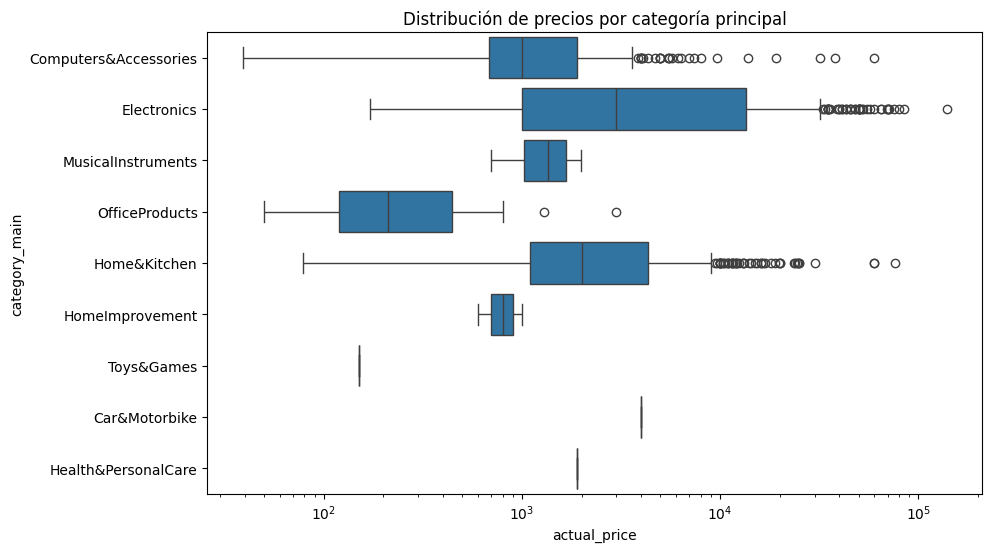

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x="actual_price", y="category_main", data=df)
plt.xscale("log")  # precios suelen ser muy dispersos
plt.title("Distribución de precios por categoría principal")
plt.show()

*Interpretación gráfica*

1. Electronics y Computers&Accessories: Son las categorías con mayor dispersión de precios y con outliers que superan los 100k. La mayoría de productos están en rangos bajos–medios, pero existen pocos artículos de precio extremadamente alto, confirmando la coexistencia de productos masivos y premium.

2. Home&Kitchen: Presenta también varios outliers de alto precio, aunque en menor magnitud que Electronics. Esto refleja la presencia de productos grandes o de lujo.

3. OfficeProducts y HomeImprovement: Más estables, aunque con algunos outliers puntuales que elevan el rango.La mayoría de productos mantienen precios moderados.

4. Categorías homogéneas en precio: Toys&Games, Car&Motorbike, Health&PersonalCare tienen precios mucho más concentrados, sin outliers tan extremos. Esto muestra que son mercados con tickets más definidos y homogéneos.

*Insights de negocio*

- En categorías populares como Electronics y Computers&Accessories, los productos premium son outliers muy marcados que no representan a la mayoría.

- El hecho de que aparezcan en los mismos listados que productos baratos puede distorsionar la percepción de precios del consumidor.

- Las categorías más homogéneas en precio son más fáciles de gestionar en estrategia de descuentos y marketing.

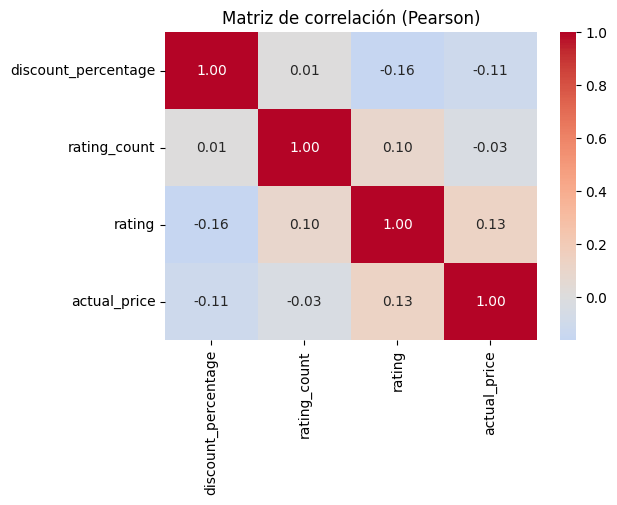

In [36]:
# Cálculo de correlaciones entre variables numéricas clave
corr_matrix = df[["discount_percentage", "rating_count", "rating", "actual_price"]].corr(method="pearson")
corr_matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación (Pearson)")
plt.show()

*Interpretación de la matriz de correlación*

 - discount_percentage vs rating → -0.16: Correlación débil y negativa. Confirma lo visto en el scatterplot: mayores descuentos no implican mejores calificaciones; incluso podrían asociarse con un rating levemente inferior.

- rating_count vs rating → +0.10: Correlación débil y positiva. Los productos con más reseñas tienden a tener una calificación un poco más alta, pero la relación es tenue.

- actual_price vs rating → +0.13: Relación débil y positiva. Sugiere que los productos más caros suelen tener valoraciones un poco mejores, quizás porque se perciben como de mayor calidad.

- discount_percentage vs actual_price → -0.11: Relación débil y negativa. Los productos más caros suelen tener menores descuentos relativos.

*Insights de negocio*

- El precio y el descuento no son los principales drivers de calificación. La satisfacción de los clientes está más influida por factores de calidad, experiencia de uso o servicio postventa.

- El volumen de reseñas sí ayuda, aunque débilmente. Más reseñas generan confianza y pueden mejorar la percepción, aunque no de forma determinante.

- Los productos premium parecen sostener mejor calificación, lo que puede usarse para reforzar el marketing de “calidad garantizada”.

##📊 Regresión lineal

Valores nulos por columna:
discount_percentage    0
rating_count           0
actual_price           0
rating                 1
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     37.73
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           2.07e-23
Time:                        18:56:44   Log-Likelihood:                -223.65
No. Observations:                1350   AIC:                             455.3
Df Residuals:                    1346   BIC:                             476.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [

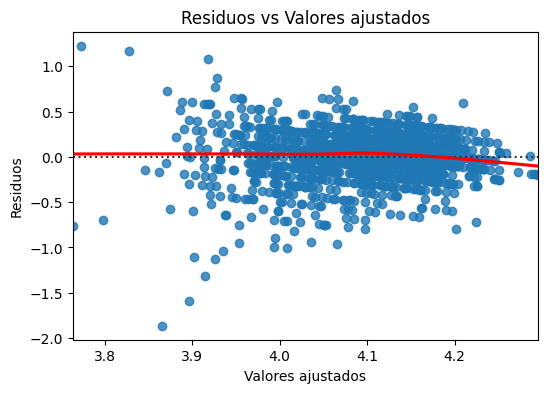

In [37]:
# ===============================
# 1. Verificar nulos
# ===============================
print("Valores nulos por columna:")
print(df[["discount_percentage", "rating_count", "actual_price", "rating"]].isnull().sum())

# ===============================
# 2. Eliminar filas con nulos y forzar tipos numéricos
# ===============================
df_clean = df.dropna(subset=["discount_percentage", "rating_count", "actual_price", "rating"]).copy()

df_clean["discount_percentage"] = df_clean["discount_percentage"].astype(float)
df_clean["rating_count"] = df_clean["rating_count"].astype(float)
df_clean["actual_price"] = df_clean["actual_price"].astype(float)
df_clean["rating"] = df_clean["rating"].astype(float)

# ===============================
# 3. Preparar variables independientes (con log transform)
# ===============================
X = df_clean[["discount_percentage", "rating_count", "actual_price"]].copy()

# Transformaciones logarítmicas para manejar asimetría
X["log_rating_count"] = np.log1p(X["rating_count"])
X["log_price"] = np.log1p(X["actual_price"])

# Seleccionamos solo las variables finales
X = X[["discount_percentage", "log_rating_count", "log_price"]]

# Variable dependiente
y = df_clean["rating"]

# Agregar constante para el intercepto
X = sm.add_constant(X)

# ===============================
# 4. Ajustar modelo OLS
# ===============================
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())

# ===============================
# 5. Gráfico de residuos
# ===============================
plt.figure(figsize=(6,4))
sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={"color":"red"})
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores ajustados")
plt.show()


*Interpretación de resultados*

1. Bondad de ajuste del modelo:

- R² = 0.078 → El modelo explica solo un 7.8% de la variabilidad del rating. Esto confirma que las calificaciones de los productos no dependen principalmente del precio ni del descuento, sino de otros factores cualitativos (calidad, servicio, expectativas).

  **El modelo es válido, pero débil como predictor. Se debe usar solo para complementar insights, no para pronóstico.**

2. Coeficientes:

- Constante (3.84) → el rating promedio base, si todas las demás variables fueran cero, sería ~3.84.

- discount_percentage = -0.0010 (p < 0.001, significativo)

  - A mayor descuento, el rating baja ligeramente.

  - Ejemplo: un +10% en descuento se asocia con una caída de 0.01 en la calificación promedio.

  - Aunque el efecto es estadísticamente significativo, es muy pequeño en magnitud.

  - Insight: descuentos no mejoran la percepción de los clientes, incluso podrían devaluar la percepción de calidad.

- log_rating_count = +0.0318 (p < 0.001, significativo)

  - Más reseñas se asocian con mejores calificaciones: si el número de reseñas aumenta 10 veces, el rating sube en promedio 0.0318.

  - Aunque el impacto es pequeño, sí refuerza la idea de que popularidad = confianza = mejor percepción.

- log_price = +0.0090 (p = 0.094, NO significativo al 95%)

  - Tendencia positiva, pero no significativa: No es posible afirmar estadísticamente que productos más caros tengan mejor calificación, aunque los datos sugieren un ligero efecto.

3. Diagnóstico de residuos

- El gráfico muestra residuos centrados en 0, con cierta dispersión y ligera curva → indica que el modelo no captura toda la complejidad (relaciones no lineales o variables omitidas).

- No se observa un patrón fuerte, pero sí asimetría → el modelo lineal es una simplificación bastante limitada.

**Insights de negocio**

- Descuentos no elevan ratings: Los clientes no califican mejor los productos porque estén más baratos; al contrario, puede haber percepción de menor calidad.

- Los productos con más reseñas tienden a mejores notas: Fomentar que los clientes dejen valoraciones puede ayudar a mejorar la percepción promedio.

- El precio no es un factor concluyente: Productos caros tienden a tener buenas calificaciones, pero el efecto no es fuerte ni significativo.

- Ratings dependen de factores no modelados: Experiencia de usuario, servicio al cliente, cumplimiento de expectativas y calidad real del producto pesan más que precio/descuento.


#🚀 Recomendaciones - Accionables

1. 💡*Segmentación por categoría y precio*

  - Dividir las categorias Electronics y Home&Kitchen en subrangos (bajo, medio, premium) para campañas y recomendaciones.

  - En categorías más homogéneas (Toys&Games, OfficeProducts, Health&PersonalCare), aplicar promociones masivas y bundles (paquetes de productos que dan lña sensación de ahorro, por ejemplo:un mouse + teclado inalámbrico por un precio menor que si se compran por separado).

  - Aislar productos premium en campañas diferenciadas (marketing aspiracional, gama alta).


2. 💡*Gestión de descuentos e inventario*

  - Reforzar descuentos más efectivos (40–60%), percibidos como atractivos sin deteriorar el margen.

  - Experimentar con descuentos intermedios (20–30%) para captar segmentos adicionales.

  - Revisar productos con más del 80% de descuento para determinar si son exceso de stock o si tienen valor estratégico.

  - Identificar productos con descuentos altos pero ratings bajos para mejorar calidad y descripción antes de seguir rebajando.


3. 💡*Mejora de percepción y ratings*

  - Fomentar las reseñas con incentivos post-venta (recordatorios, descuentos, puntos).

  - Estimular reseñas en productos nuevos o con baja visibilidad para aumentar credibilidad.

  - Destacar productos con muchas reseñas positivas como “anclas de confianza” en marketing.

  - Invertir en experiencia de producto, soporte y entregas rápidas para no depender solo del precio.

  - Separar estrategia de pricing de estrategia de satisfacción, pues un descuento impulsa ventas, pero no necesariamente mejora el rating.
      
      - Estrategia de pricing (precio/ventas):Se centra en maximizar rotación de inventario y volumen de ventas. Bajar el precio sube la probabilidad de compra.

      - Estrategia de satisfacción (rating/experiencia): Busca mejorar la percepción del producto y la confianza del cliente. La calificación no depende solo del precio sino que está más influida por calidad, entrega, servicio y cumplimiento de expectativas.

4. 💡*Categorías prioritarias*

  - Potenciar las categorias de OfficeProducts, Toys&Games, HomeImprovement: destacarlas en campañas y usar bundles y cross-selling (ventas cruzadas: sugerir productos complementarios).

  - Diagnosticar las categorias de Car&Motorbike y MusicalInstruments: revisar reseñas negativas, fortalecer control de calidad o explorar nuevos proveedores.

  - Optimizar las categorias de Electronics y Computers&Accessories: identificar subcategorías fuertes y reforzar contenido visual en productos con baja calificación.
